In [71]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Examining different reward functions
1. Average change in area across plants
2. Median change in area across plants

### Data Processing

In [72]:
path = os.path.dirname(os.path.abspath("")) + '/src/environments/plant_area_data.csv'
df = pd.read_csv(path).sort_values(by='timestamp')
df

timestamp  plant 1 (4-12-7)  plant 2 (4-12-7)  plant 3 (4-12-7)  \
0     2024-02-10 09:00             559.0             439.0             335.0   
1     2024-02-10 09:10             548.0             390.0             338.0   
2     2024-02-10 09:20             560.0             426.0             328.0   
3     2024-02-10 09:30             549.0             438.0             342.0   
4     2024-02-10 09:40             561.0             444.0             353.0   
...                ...               ...               ...               ...   
1147  2024-02-25 20:10           11686.0           12803.0            7629.0   
1148  2024-02-25 20:20           11693.0           12830.0            7632.0   
1149  2024-02-25 20:30           11720.0           12809.0            7668.0   
1150  2024-02-25 20:40           11709.0           12894.0            7614.0   
1151  2024-02-25 20:50           11720.0           12910.0            7620.0   

      plant 4 (4-12-7)  plant 5 (4-12-7)  plant 6 (4-12-7)  plant 7 (4-12-7)  \
0                370.0             302.0             353.0             373.0   
1                363.0             302.0             277.0             336.0   
2                371.0             303.0             275.0             365.0   
3                367.0             296.0             266.0             370.0   
4                376.0             308.0             272.0             372.0   
...                ...               ...               ...               ...   
1147            8878.0            8955.0            9167.0            9221.0   
1148            8858.0            8955.0            9277.0            8552.0   
1149            8916.0            9089.0            9438.0            9027.0   
1150            8935.0            8966.0            9280.0            8617.0   
1151            8903.0            9080.0            9414.0            8454.0   

      plant 8 (4-12-7)  plant 9 (10-6)  ...  plant 55 (12-2)  plant 56 (9-11)  \
0                267.0           289.0  ...            198.0            398.0   
1                224.0           275.0  ...            206.0            416.0   
2                240.0           284.0  ...            199.0            411.0   
3                248.0           284.0  ...            201.0            407.0   
4                257.0           281.0  ...            198.0            411.0   
...                ...             ...  ...              ...              ...   
1147            8905.0          6813.0  ...           5523.0           8775.0   
1148            7615.0          6857.0  ...           5545.0           8824.0   
1149            8788.0          6859.0  ...           5553.0           8782.0   
1150            8497.0          6889.0  ...           5603.0           8802.0   
1151            7325.0          6882.0  ...           5609.0           8813.0   

      plant 57 (4-11-4)  plant 58 (WT)  plant 59 (11-13)  plant 60 (9-11)  \
0                 628.0          343.0             319.0            209.0   
1                 627.0          351.0             327.0            212.0   
2                 631.0          329.0             316.0            209.0   
3                 635.0          338.0             318.0            211.0   
4                 638.0          335.0             324.0            217.0   
...                 ...            ...               ...              ...   
1147             9342.0         7839.0            5135.0           5613.0   
1148             9420.0         7877.0            5152.0           5657.0   
1149             9431.0         7839.0            5132.0           5666.0   
1150             9490.0         7860.0            5176.0           5685.0   
1151             9505.0         7915.0            5168.0           5705.0   

      plant 61 (12-2)  plant 62 (11-19)  plant 63 (10-6)  plant 64 (4-12-7)  
0               325.0             293.0            192.0              382.0  
1               322.0             294

In [73]:
# Get change in area at each timestep
delta_df = df.copy()
delta_df.loc[:, delta_df.columns != 'timestamp'] = delta_df.loc[:, delta_df.columns != 'timestamp'].diff()
delta_df = delta_df.iloc[1:]
delta_df

timestamp  plant 1 (4-12-7)  plant 2 (4-12-7)  plant 3 (4-12-7)  \
1     2024-02-10 09:10             -11.0             -49.0               3.0   
2     2024-02-10 09:20              12.0              36.0             -10.0   
3     2024-02-10 09:30             -11.0              12.0              14.0   
4     2024-02-10 09:40              12.0               6.0              11.0   
5     2024-02-10 09:50              -3.0             -11.0             -10.0   
...                ...               ...               ...               ...   
1147  2024-02-25 20:10              12.0              42.0              51.0   
1148  2024-02-25 20:20               7.0              27.0               3.0   
1149  2024-02-25 20:30              27.0             -21.0              36.0   
1150  2024-02-25 20:40             -11.0              85.0             -54.0   
1151  2024-02-25 20:50              11.0              16.0               6.0   

      plant 4 (4-12-7)  plant 5 (4-12-7)  plant 6 (4-12-7)  plant 7 (4-12-7)  \
1                 -7.0               0.0             -76.0             -37.0   
2                  8.0               1.0              -2.0              29.0   
3                 -4.0              -7.0              -9.0               5.0   
4                  9.0              12.0               6.0               2.0   
5                  3.0               2.0              14.0             -12.0   
...                ...               ...               ...               ...   
1147               7.0             -49.0             -61.0             789.0   
1148             -20.0               0.0             110.0            -669.0   
1149              58.0             134.0             161.0             475.0   
1150              19.0            -123.0            -158.0            -410.0   
1151             -32.0             114.0             134.0            -163.0   

      plant 8 (4-12-7)  plant 9 (10-6)  ...  plant 55 (12-2)  plant 56 (9-11)  \
1                -43.0           -14.0  ...              8.0             18.0   
2                 16.0             9.0  ...             -7.0             -5.0   
3                  8.0             0.0  ...              2.0             -4.0   
4                  9.0            -3.0  ...             -3.0              4.0   
5                 -3.0            -3.0  ...              9.0              3.0   
...                ...             ...  ...              ...              ...   
1147            1314.0            13.0  ...            -11.0             -7.0   
1148           -1290.0            44.0  ...             22.0             49.0   
1149            1173.0             2.0  ...              8.0            -42.0   
1150            -291.0            30.0  ...             50.0             20.0   
1151           -1172.0            -7.0  ...              6.0             11.0   

      plant 57 (4-11-4)  plant 58 (WT)  plant 59 (11-13)  plant 60 (9-11)  \
1                  -1.0            8.0               8.0              3.0   
2                   4.0          -22.0             -11.0             -3.0   
3                   4.0            9.0               2.0              2.0   
4                   3.0           -3.0               6.0              6.0   
5                  -5.0           11.0               4.0              2.0   
...                 ...            ...               ...              ...   
1147               10.0           -4.0             -11.0             24.0   
1148               78.0           38.0              17.0             44.0   
1149               11.0          -38.0             -20.0              9.0   
1150               59.0           21.0              44.0             19.0   
1151               15.0           55.0              -8.0             20.0   

      plant 61 (12-2)  plant 62 (11-19)  plant 63 (10-6)  plant 64 (4-12-7)  
1                -3.0               1.0             -3.0                4.0  
2                 0.0              -8

In [74]:
# Get median and mean change across all plants for each row
delta_df['median_change'] = delta_df.loc[:, delta_df.columns != 'timestamp'].median(axis=1)
delta_df['mean_change'] = delta_df.loc[:, delta_df.columns != 'timestamp'].mean(axis=1)
delta_df

timestamp  plant 1 (4-12-7)  plant 2 (4-12-7)  plant 3 (4-12-7)  \
1     2024-02-10 09:10             -11.0             -49.0               3.0   
2     2024-02-10 09:20              12.0              36.0             -10.0   
3     2024-02-10 09:30             -11.0              12.0              14.0   
4     2024-02-10 09:40              12.0               6.0              11.0   
5     2024-02-10 09:50              -3.0             -11.0             -10.0   
...                ...               ...               ...               ...   
1147  2024-02-25 20:10              12.0              42.0              51.0   
1148  2024-02-25 20:20               7.0              27.0               3.0   
1149  2024-02-25 20:30              27.0             -21.0              36.0   
1150  2024-02-25 20:40             -11.0              85.0             -54.0   
1151  2024-02-25 20:50              11.0              16.0               6.0   

      plant 4 (4-12-7)  plant 5 (4-12-7)  plant 6 (4-12-7)  plant 7 (4-12-7)  \
1                 -7.0               0.0             -76.0             -37.0   
2                  8.0               1.0              -2.0              29.0   
3                 -4.0              -7.0              -9.0               5.0   
4                  9.0              12.0               6.0               2.0   
5                  3.0               2.0              14.0             -12.0   
...                ...               ...               ...               ...   
1147               7.0             -49.0             -61.0             789.0   
1148             -20.0               0.0             110.0            -669.0   
1149              58.0             134.0             161.0             475.0   
1150              19.0            -123.0            -158.0            -410.0   
1151             -32.0             114.0             134.0            -163.0   

      plant 8 (4-12-7)  plant 9 (10-6)  ...  plant 57 (4-11-4)  plant 58 (WT)  \
1                -43.0           -14.0  ...               -1.0            8.0   
2                 16.0             9.0  ...                4.0          -22.0   
3                  8.0             0.0  ...                4.0            9.0   
4                  9.0            -3.0  ...                3.0           -3.0   
5                 -3.0            -3.0  ...               -5.0           11.0   
...                ...             ...  ...                ...            ...   
1147            1314.0            13.0  ...               10.0           -4.0   
1148           -1290.0            44.0  ...               78.0           38.0   
1149            1173.0             2.0  ...               11.0          -38.0   
1150            -291.0            30.0  ...               59.0           21.0   
1151           -1172.0            -7.0  ...               15.0           55.0   

      plant 59 (11-13)  plant 60 (9-11)  plant 61 (12-2)  plant 62 (11-19)  \
1                  8.0              3.0             -3.0               1.0   
2                -11.0             -3.0              0.0              -8.0   
3                  2.0              2.0             -9.0               2.0   
4                  6.0              6.0             11.0               8.0   
5                  4.0              2.0             -5.0              -3.0   
...                ...              ...              ...               ...   
1147             -11.0             24.0             -6.0             -21.0   
1148              17.0             44.0             28.0              47.0   
1149             -20.0              9.0             -5.0              -5.0   
1150              44.0             19.0             28.0              36.0   
1151              -8.0             20.0             16.0              29.0   

      plant 63 (10-6)  plant 64 (4-12-7)  median_change  mean_change  
1                -3.0                4.0            5.5     1.638462  
2               -10.0               -8.

### Plots

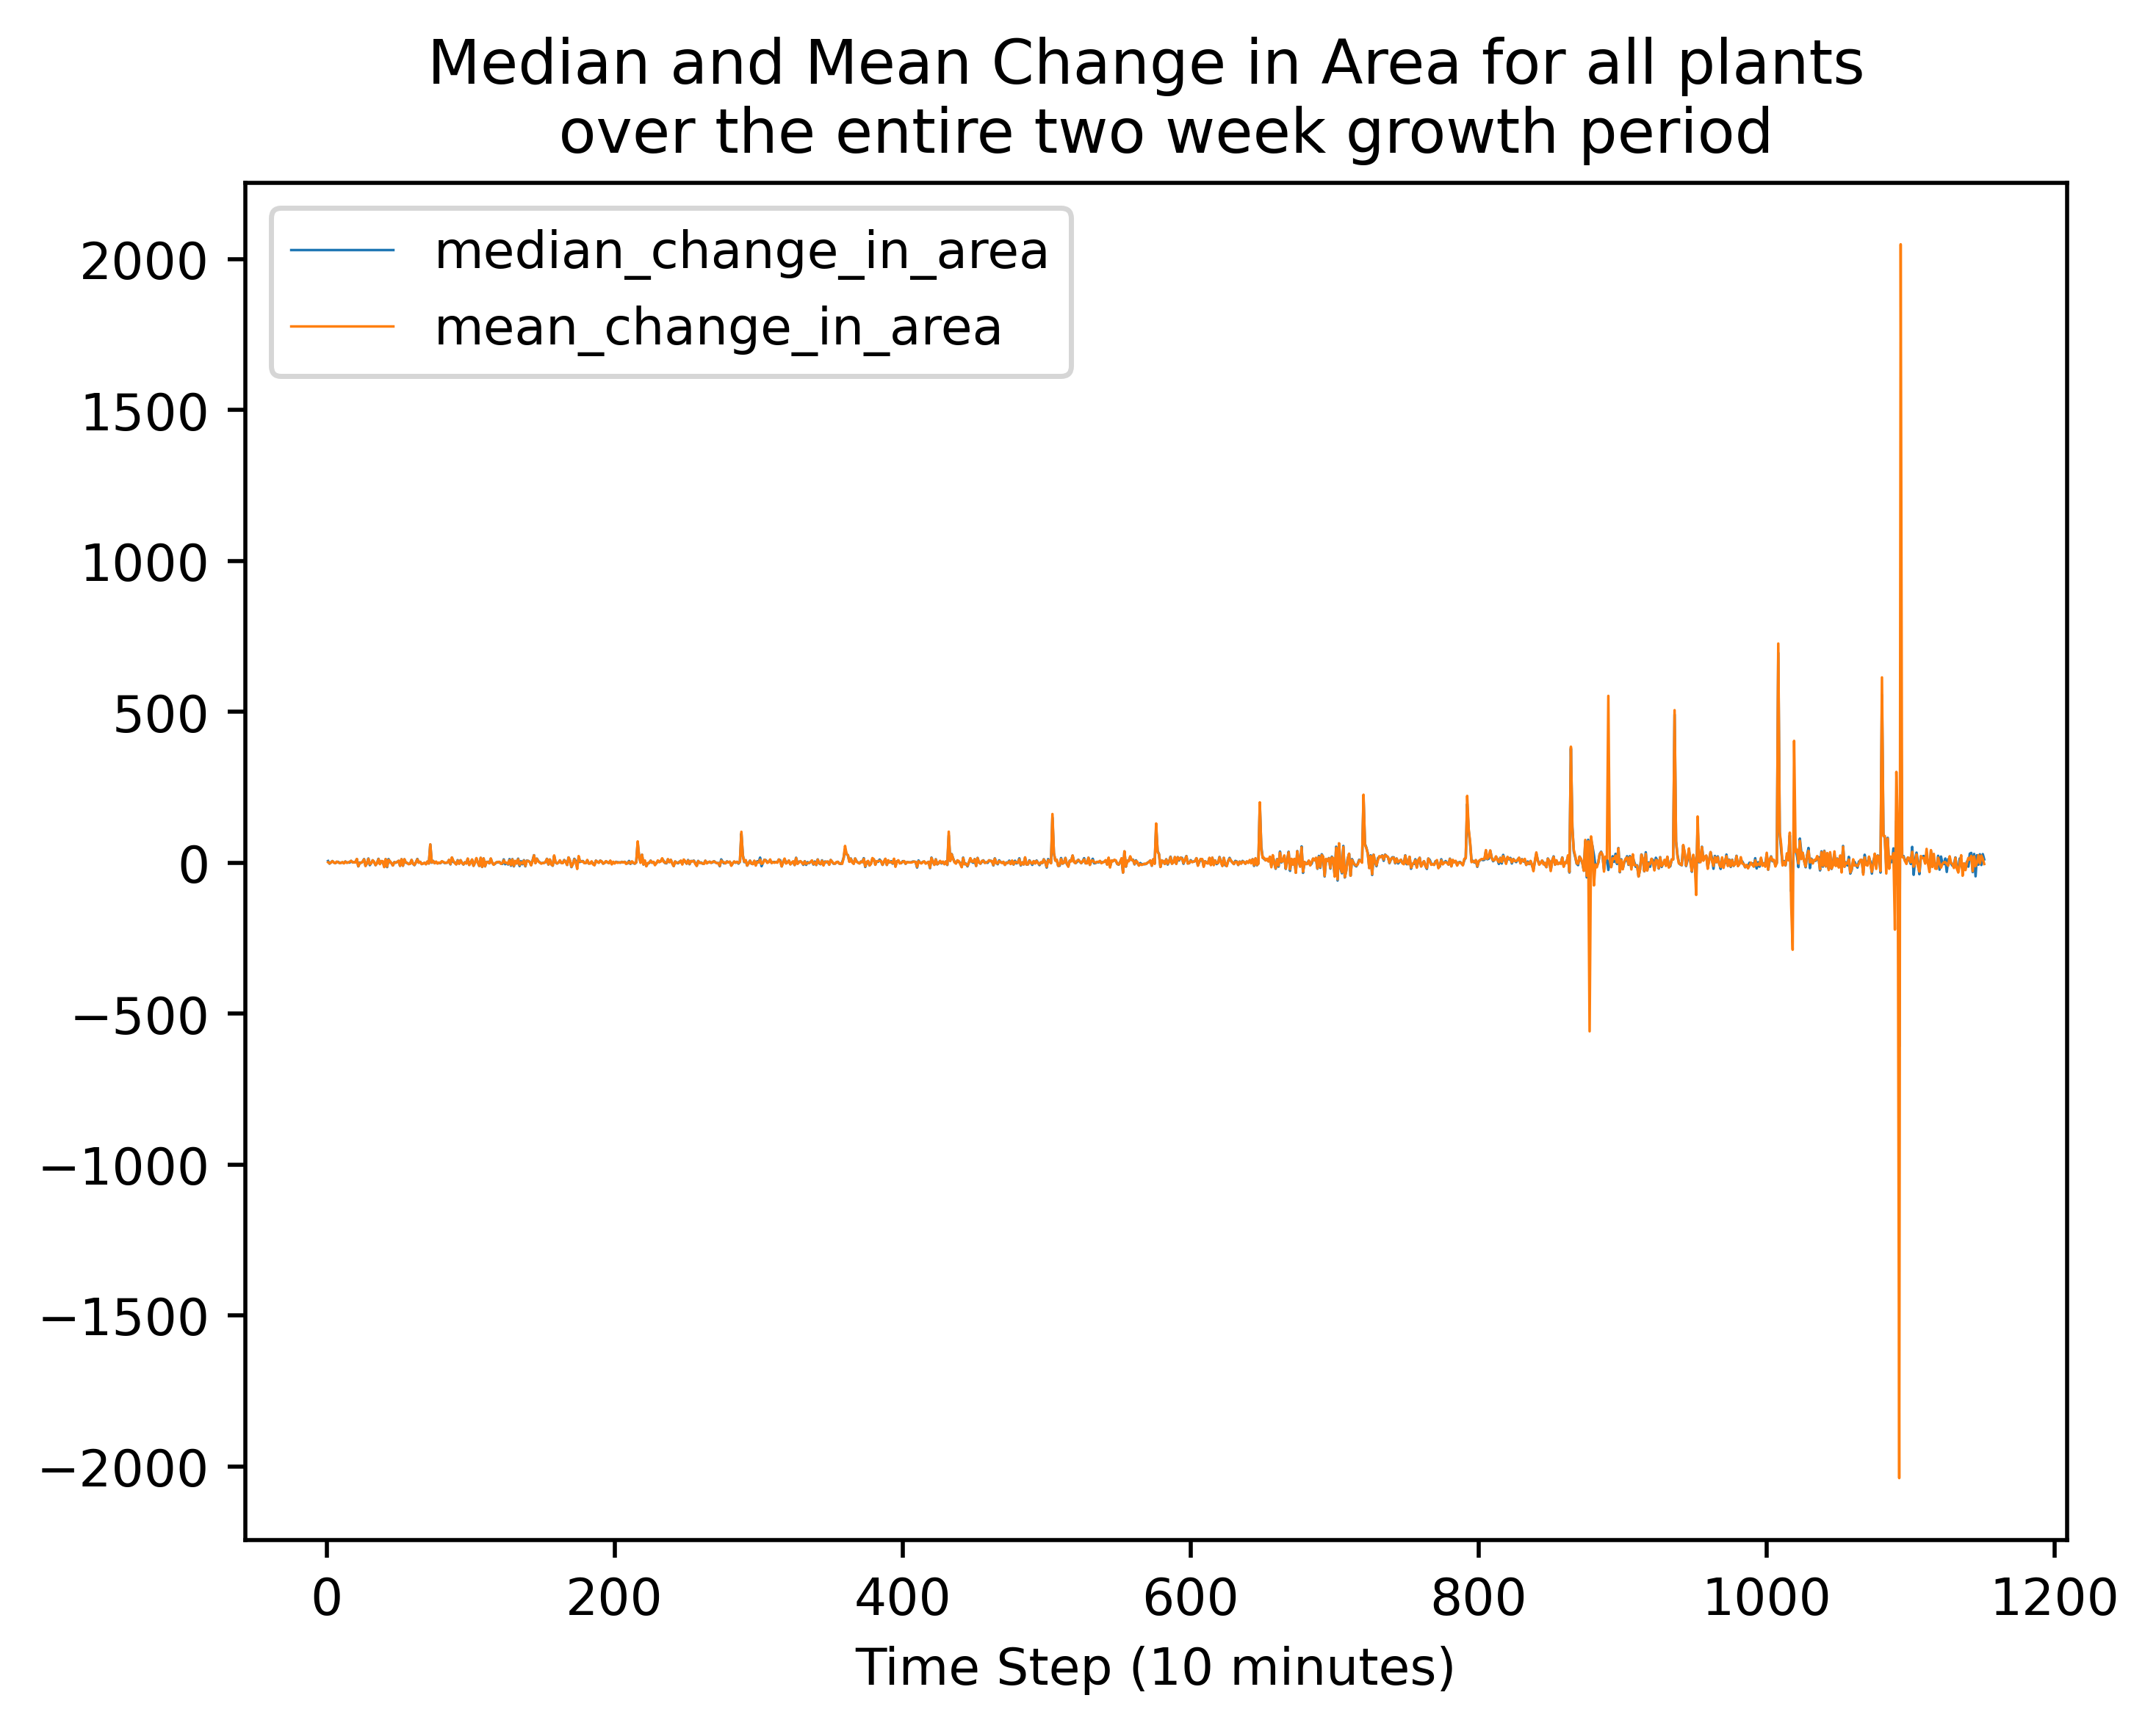

In [75]:
plt.figure(dpi=500)
plt.plot(delta_df['median_change'], label='median_change_in_area', linewidth=0.5)
plt.plot(delta_df['mean_change'], label='mean_change_in_area', linewidth=0.5)
plt.xlabel('Time Step (10 minutes)')
plt.title("Median and Mean Change in Area for all plants \n over the entire two week growth period")
plt.legend()
plt.show()

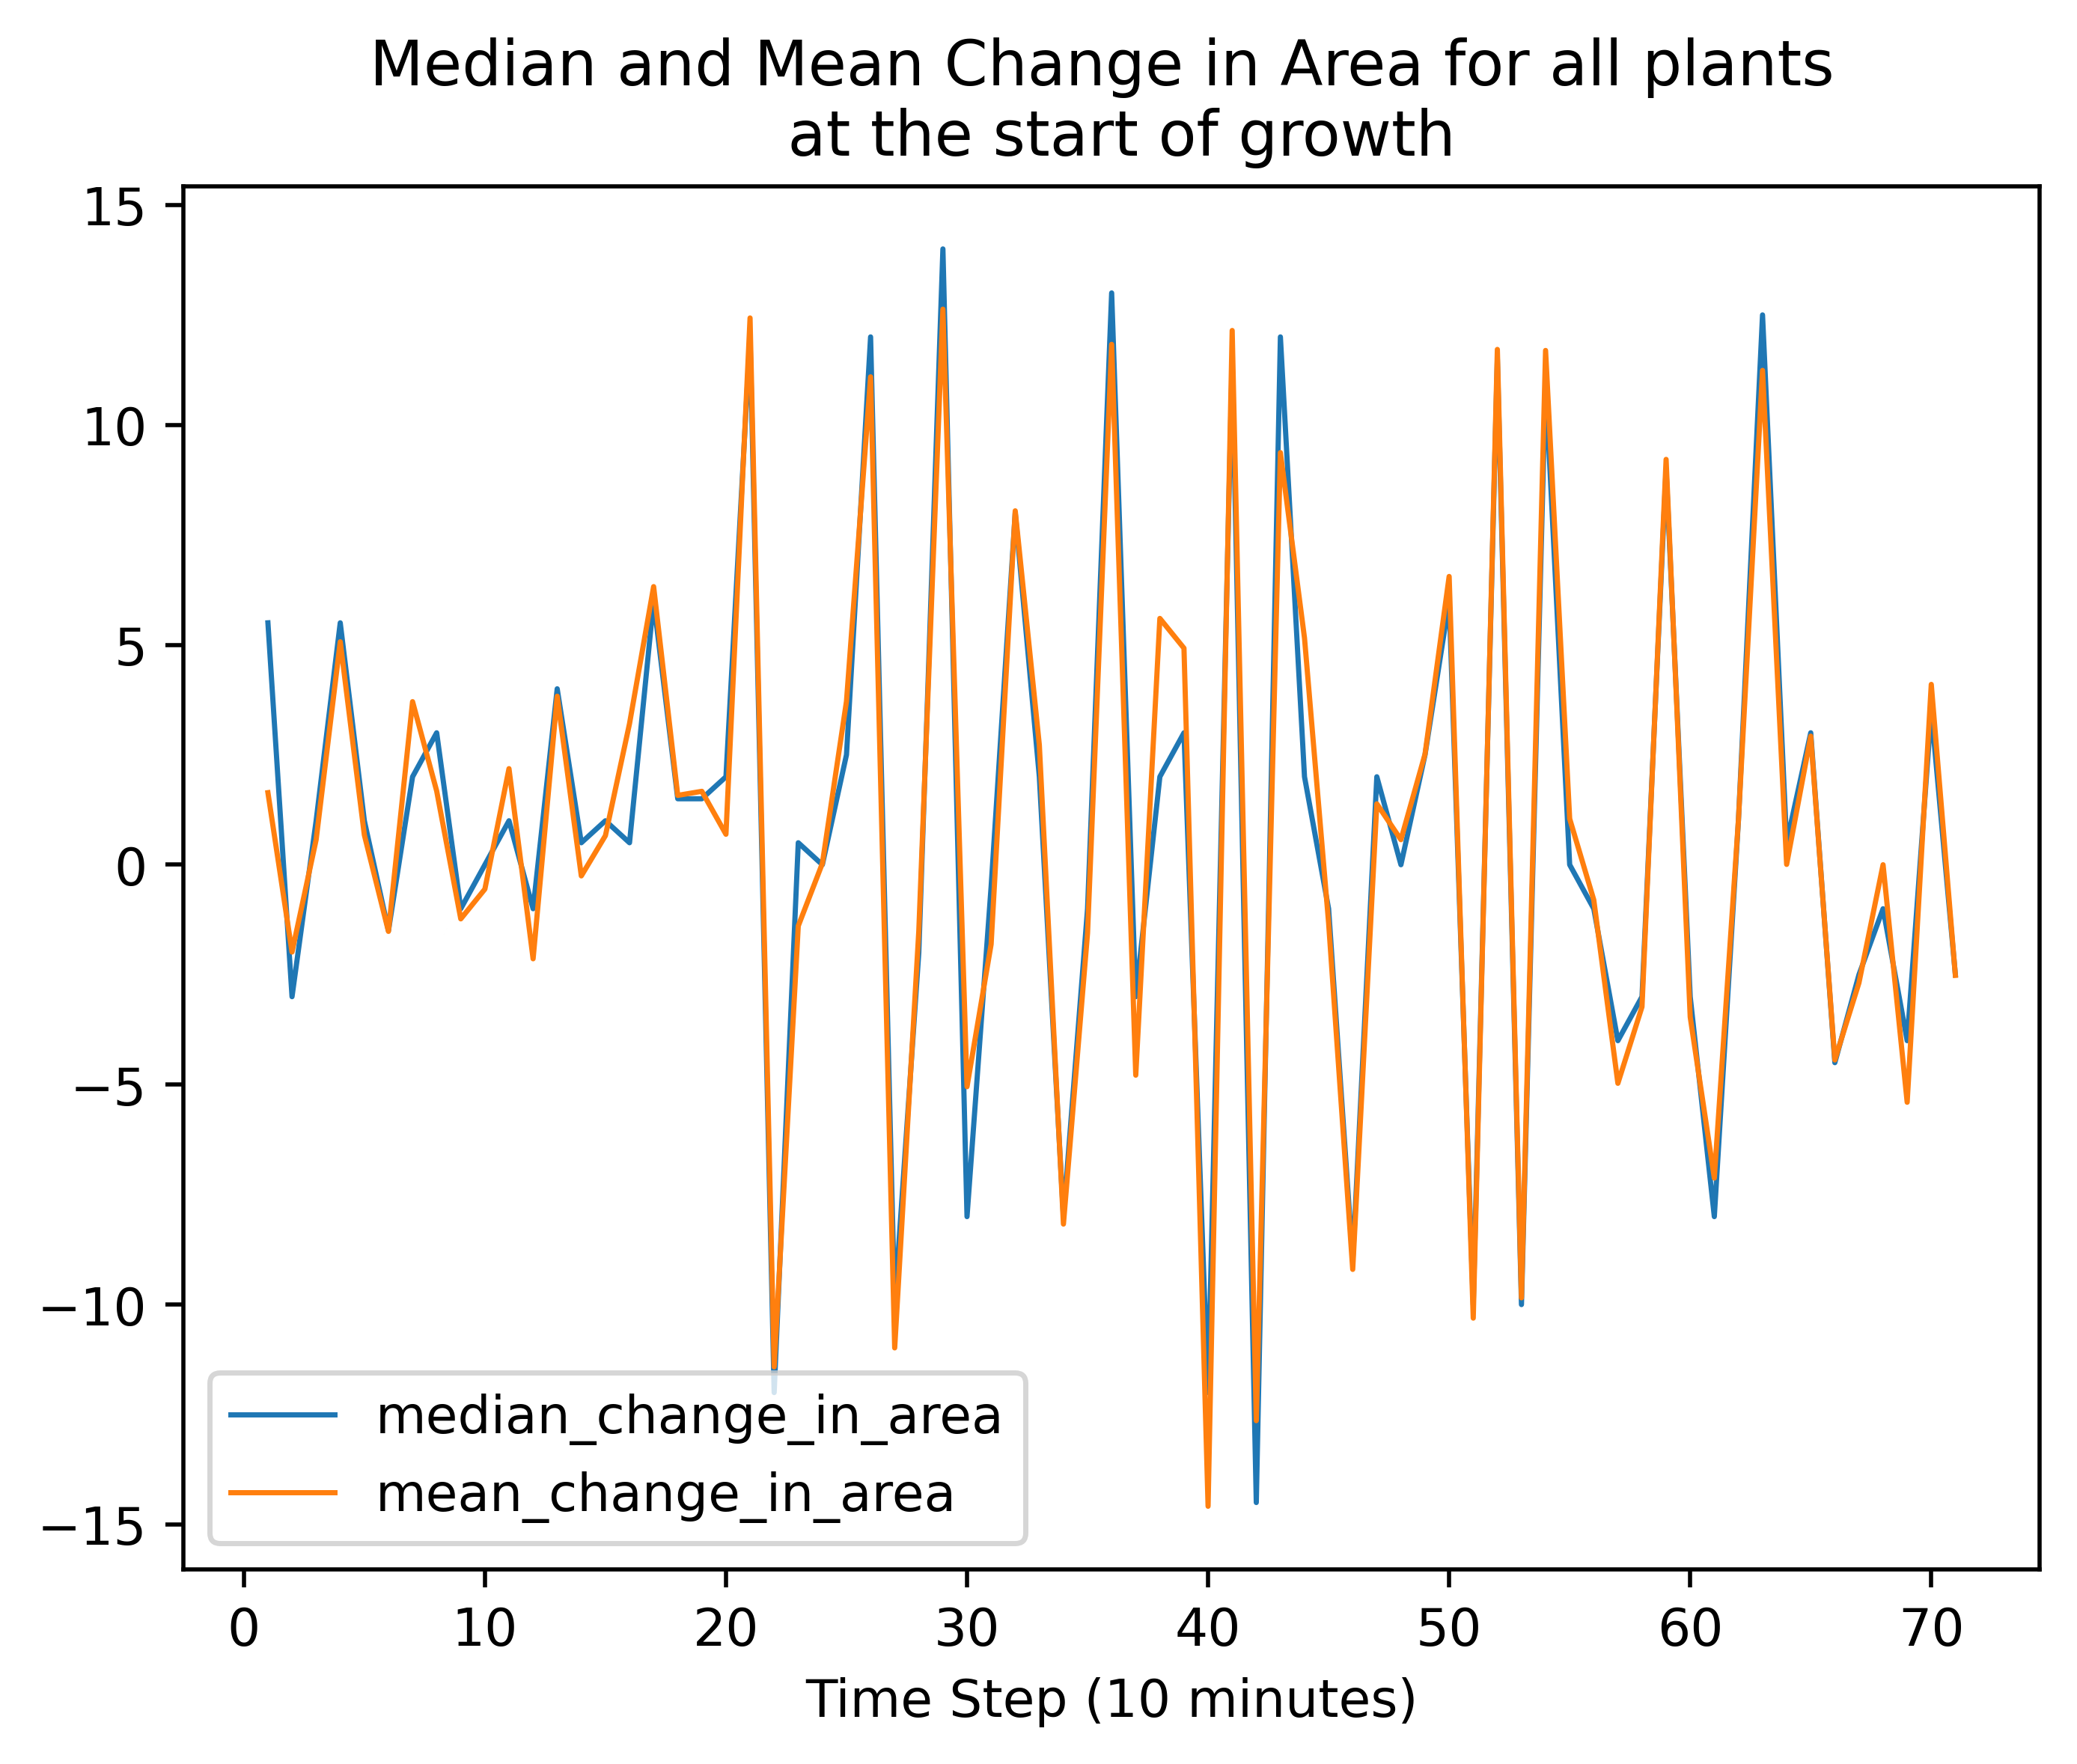

In [76]:
plt.figure(dpi=500)
plt.plot(delta_df['median_change'][:71], label='median_change_in_area', linewidth=1)
plt.plot(delta_df['mean_change'][:71], label='mean_change_in_area', linewidth=1)
plt.xlabel('Time Step (10 minutes)')
plt.title("Median and Mean Change in Area for all plants \n at the start of growth")
plt.legend()
plt.show()

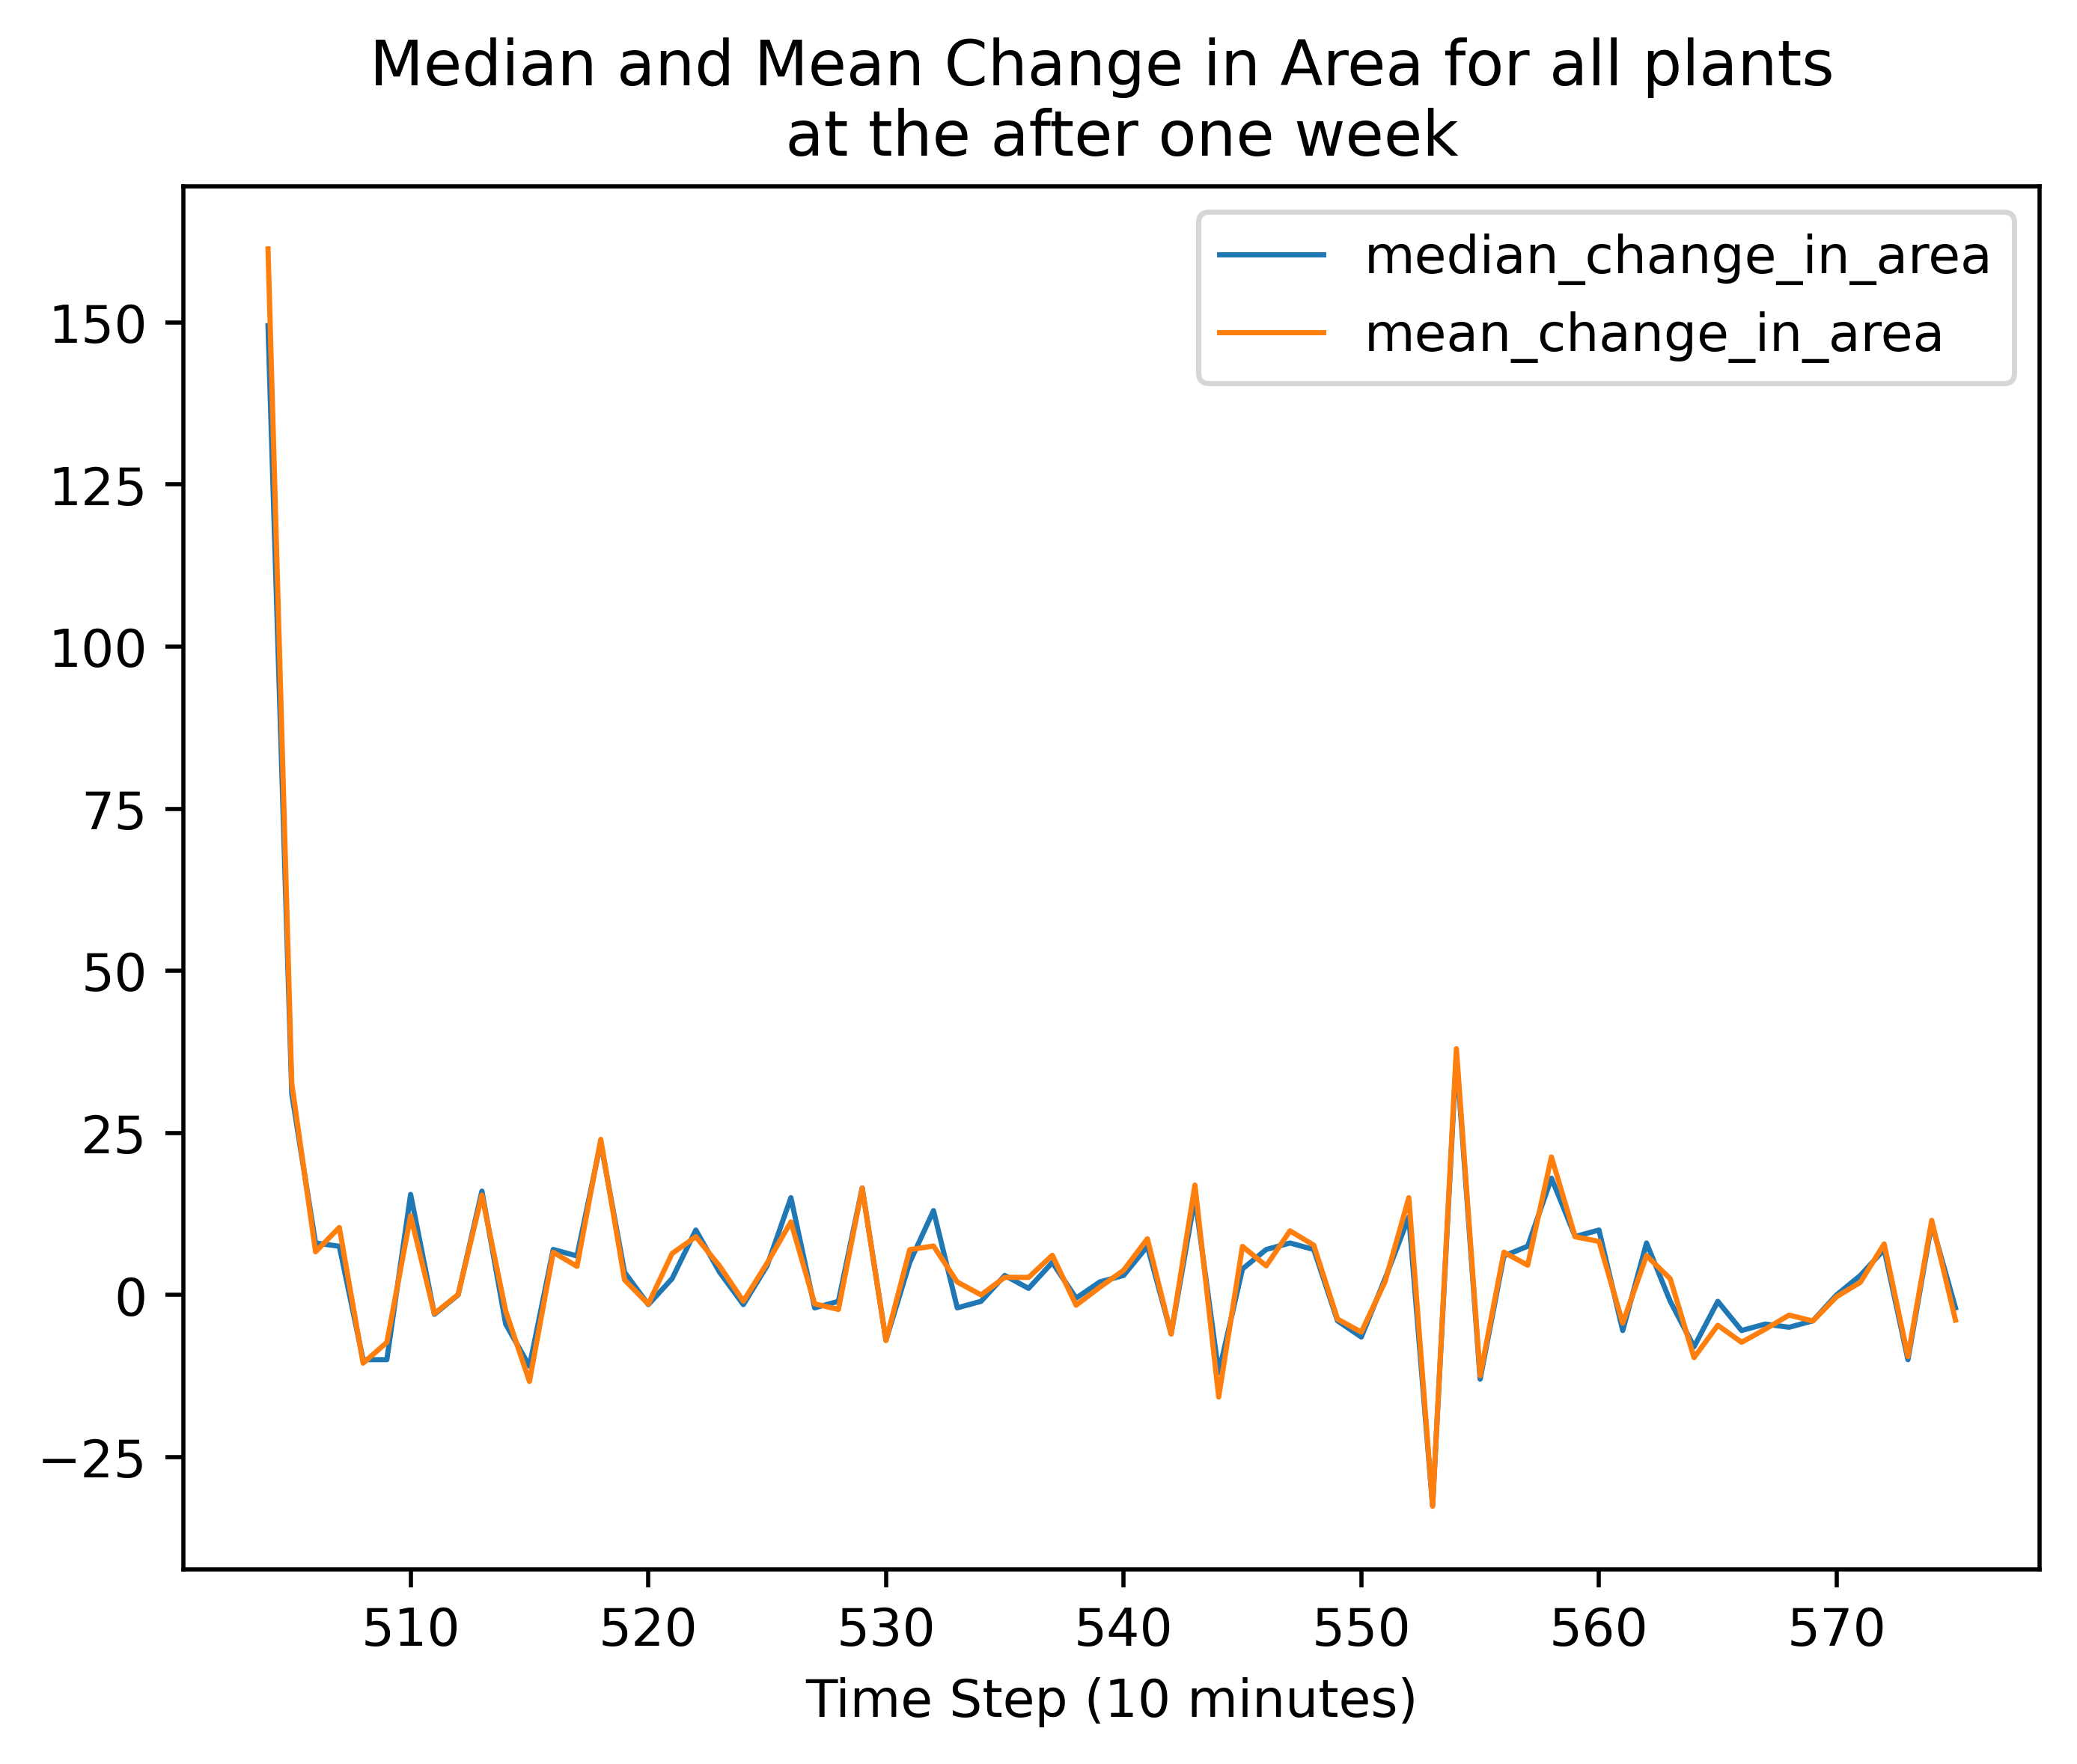

In [77]:
plt.figure(dpi=500)
plt.plot(delta_df['median_change'][503:575], label='median_change_in_area', linewidth=1)
plt.plot(delta_df['mean_change'][503:575], label='mean_change_in_area', linewidth=1)
plt.xlabel('Time Step (10 minutes)')
plt.title("Median and Mean Change in Area for all plants \n at the after one week")
plt.legend()
plt.show()

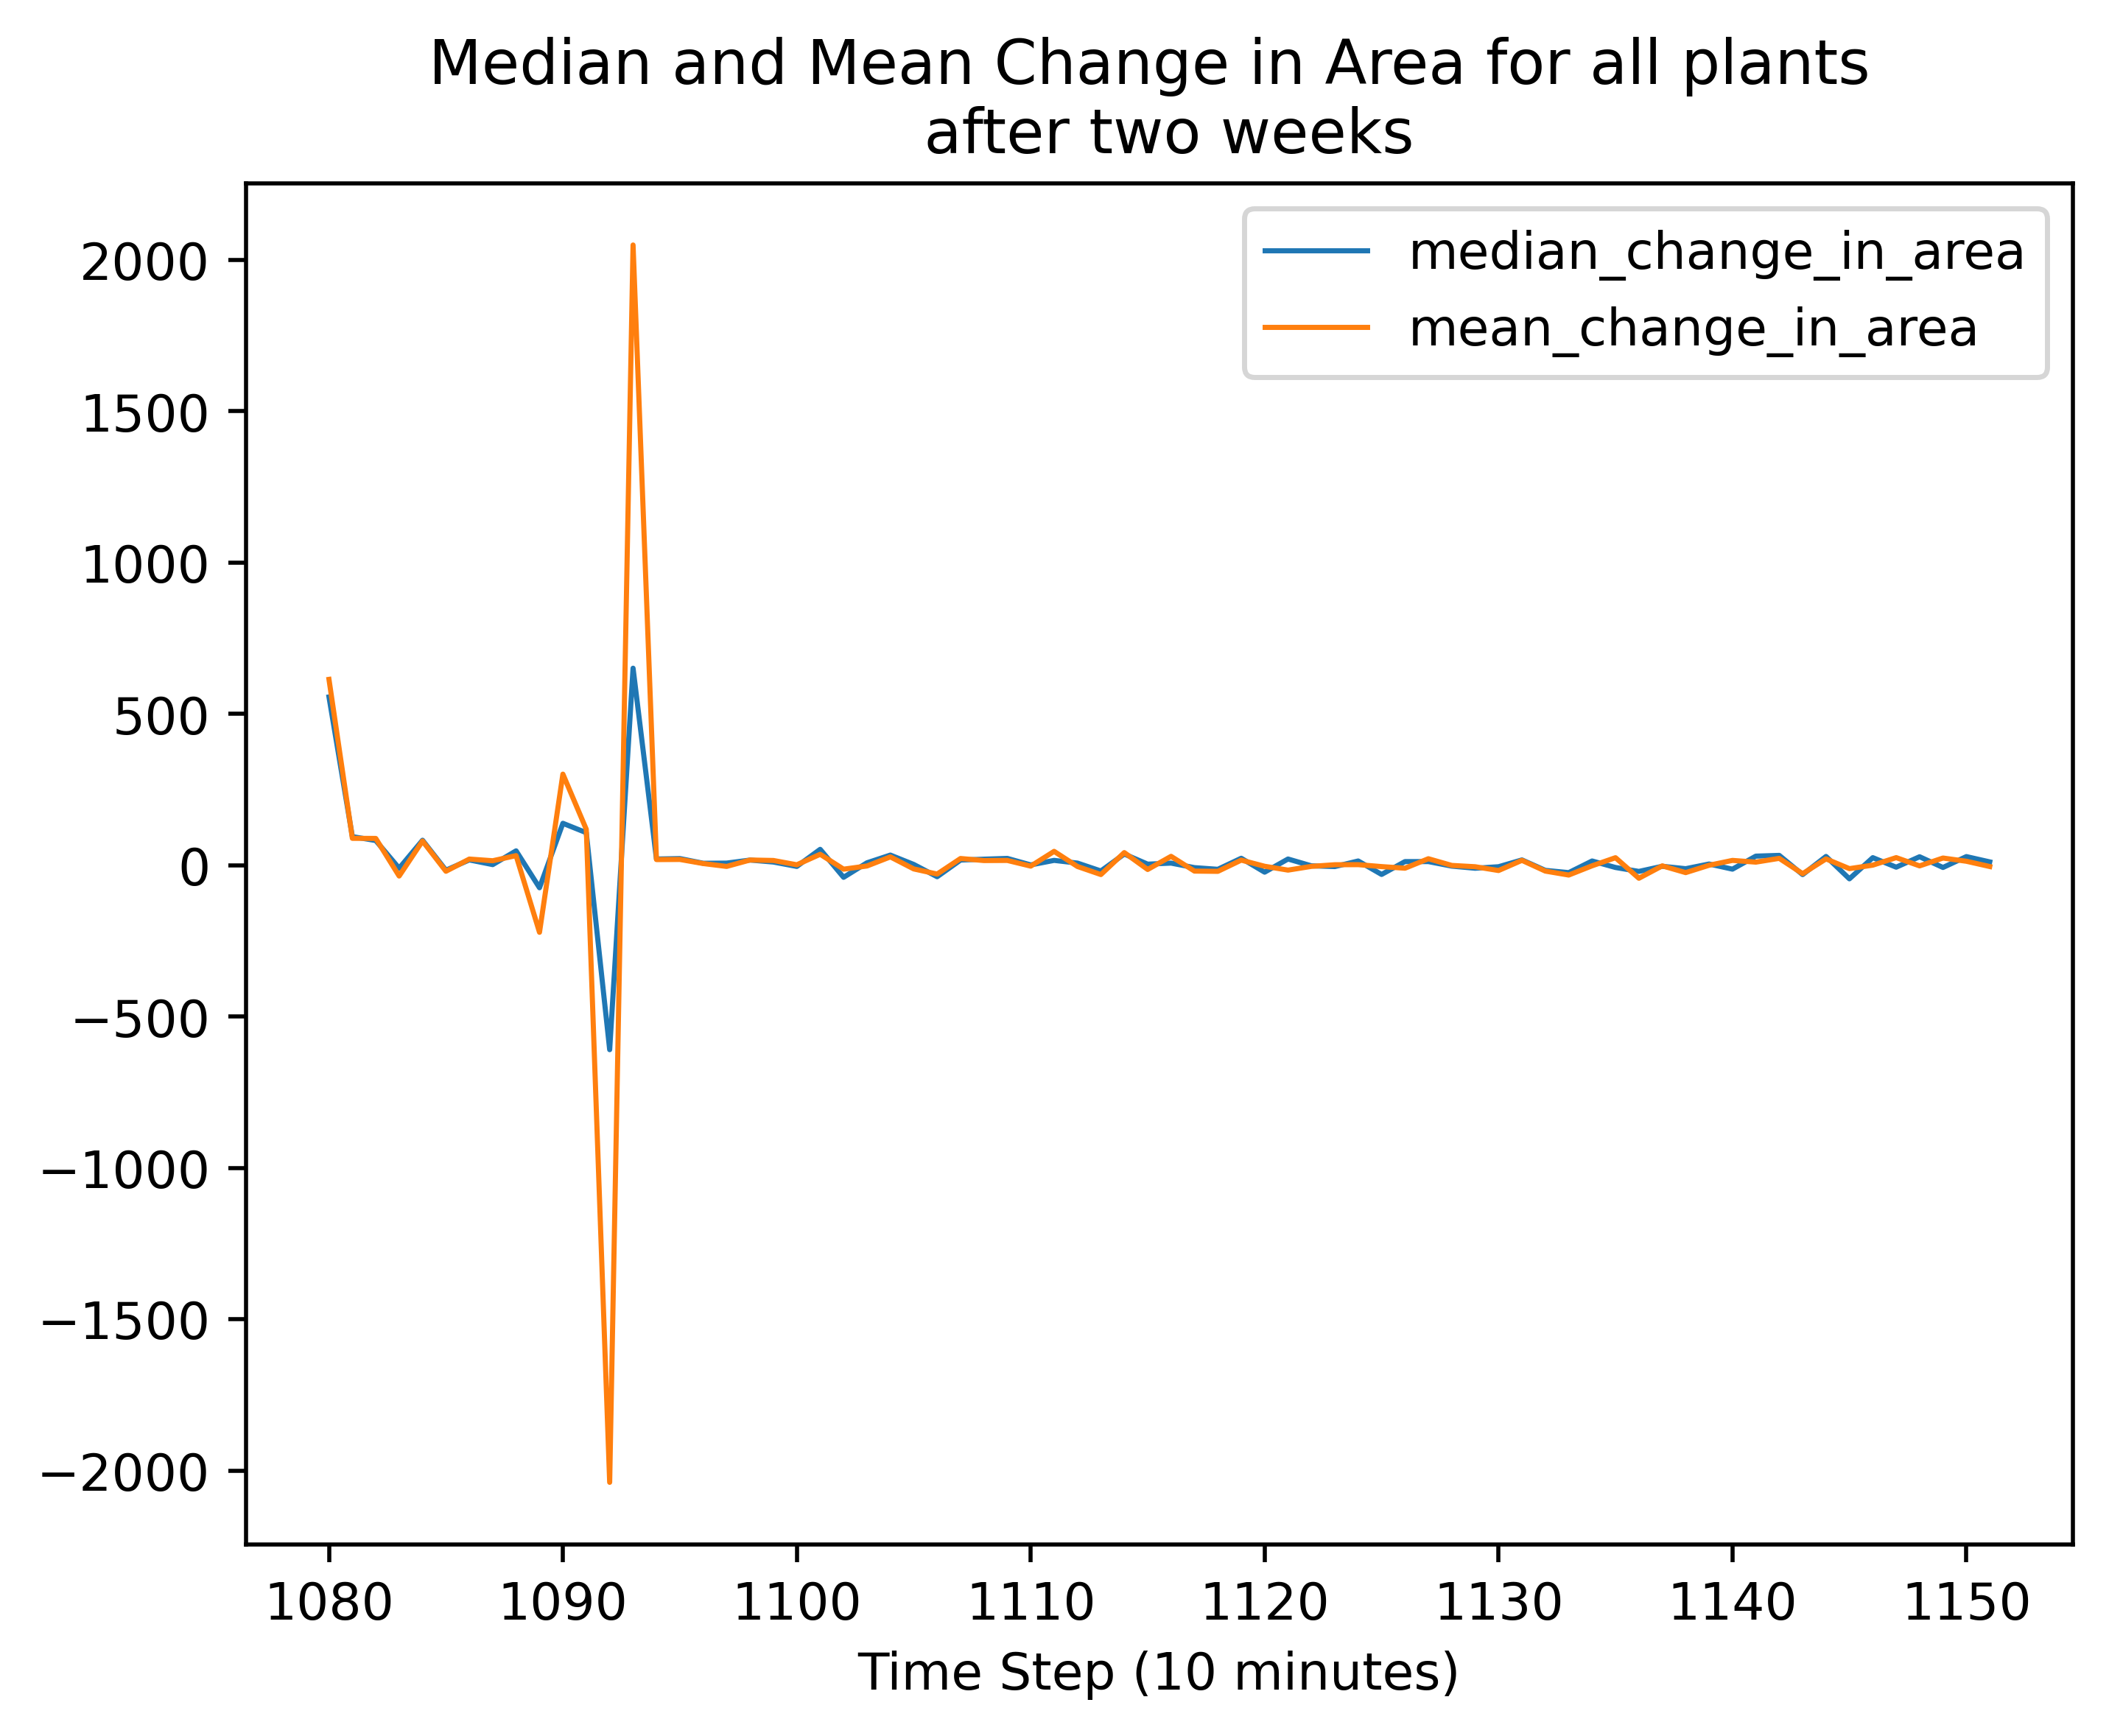

In [78]:
plt.figure(dpi=500)
plt.plot(delta_df['median_change'][1079:], label='median_change_in_area', linewidth=1)
plt.plot(delta_df['mean_change'][1079:], label='mean_change_in_area', linewidth=1)
plt.xlabel('Time Step (10 minutes)')
plt.title("Median and Mean Change in Area for all plants \n after two weeks")
plt.legend()
plt.show()

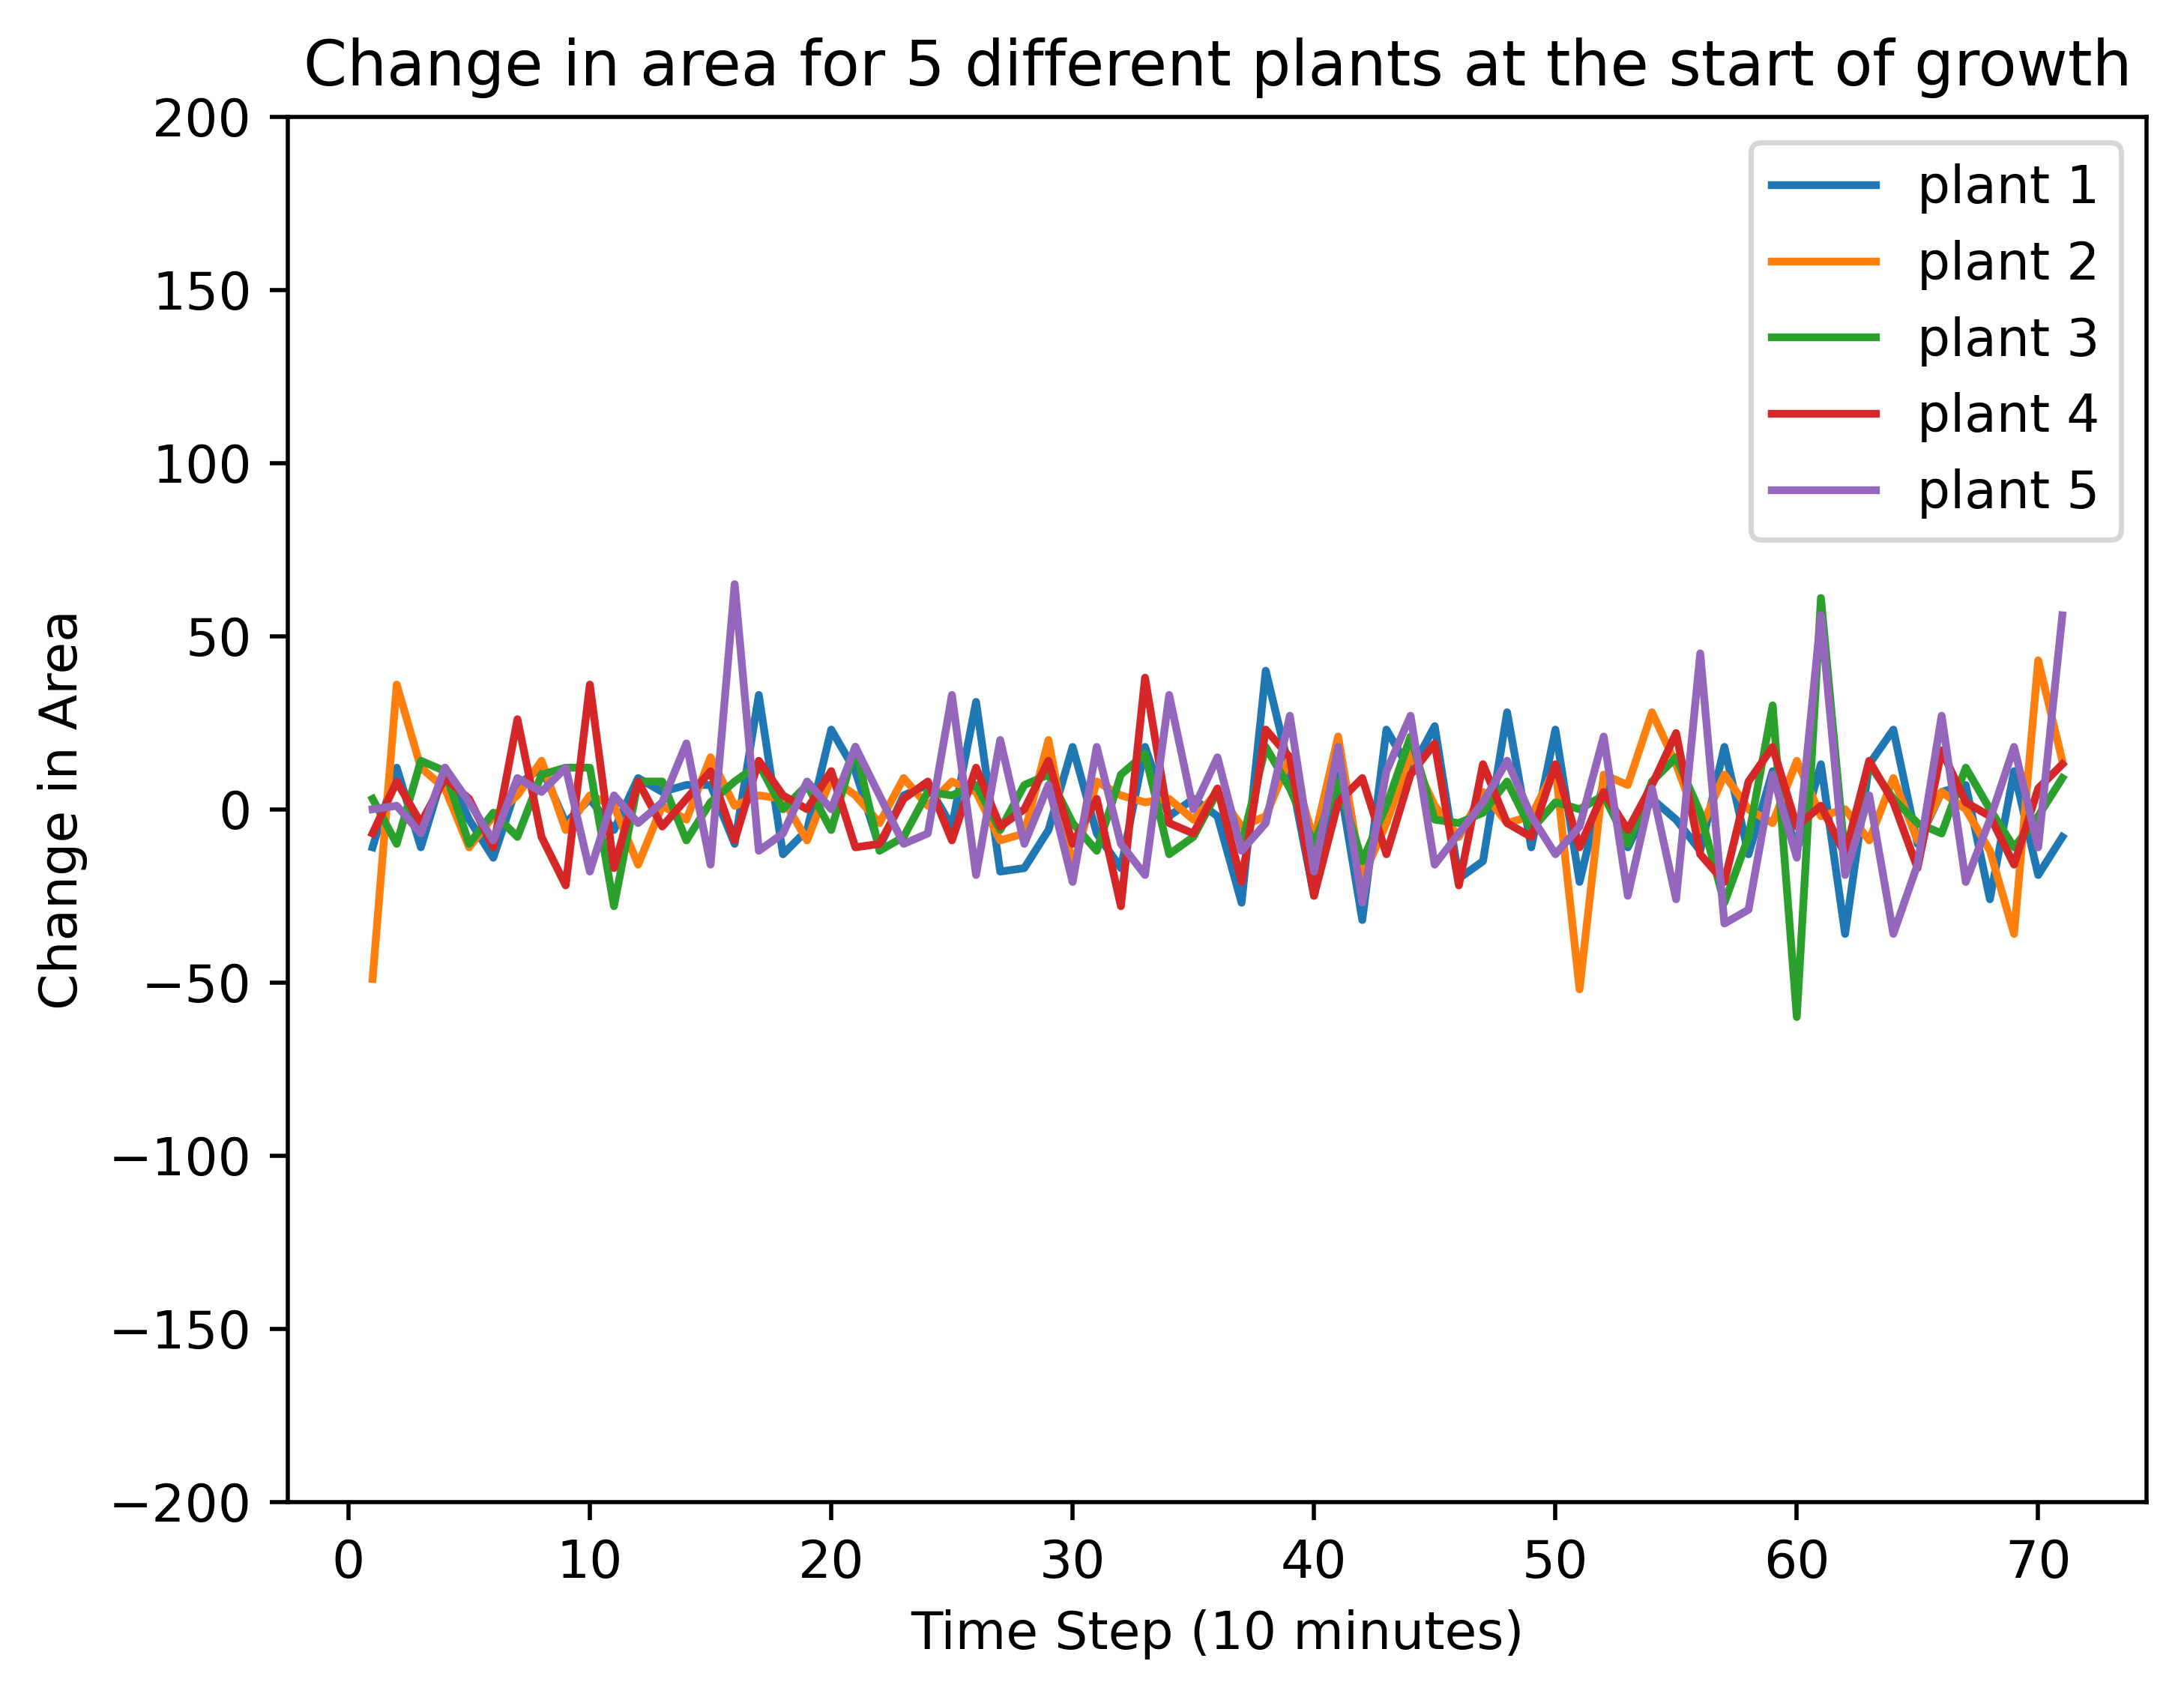

In [79]:
plt.figure(dpi=500)
example_plants = delta_df.iloc[:71, 1:6]
for plant in example_plants.columns:
    label = ' '.join(plant.split()[:2])
    plt.plot(example_plants.index, example_plants[plant], label=label)

plt.ylim(-200, 200)
plt.xlabel('Time Step (10 minutes)')
plt.ylabel('Change in Area')
plt.title("Change in area for 5 different plants at the start of growth")
plt.legend()
plt.show()

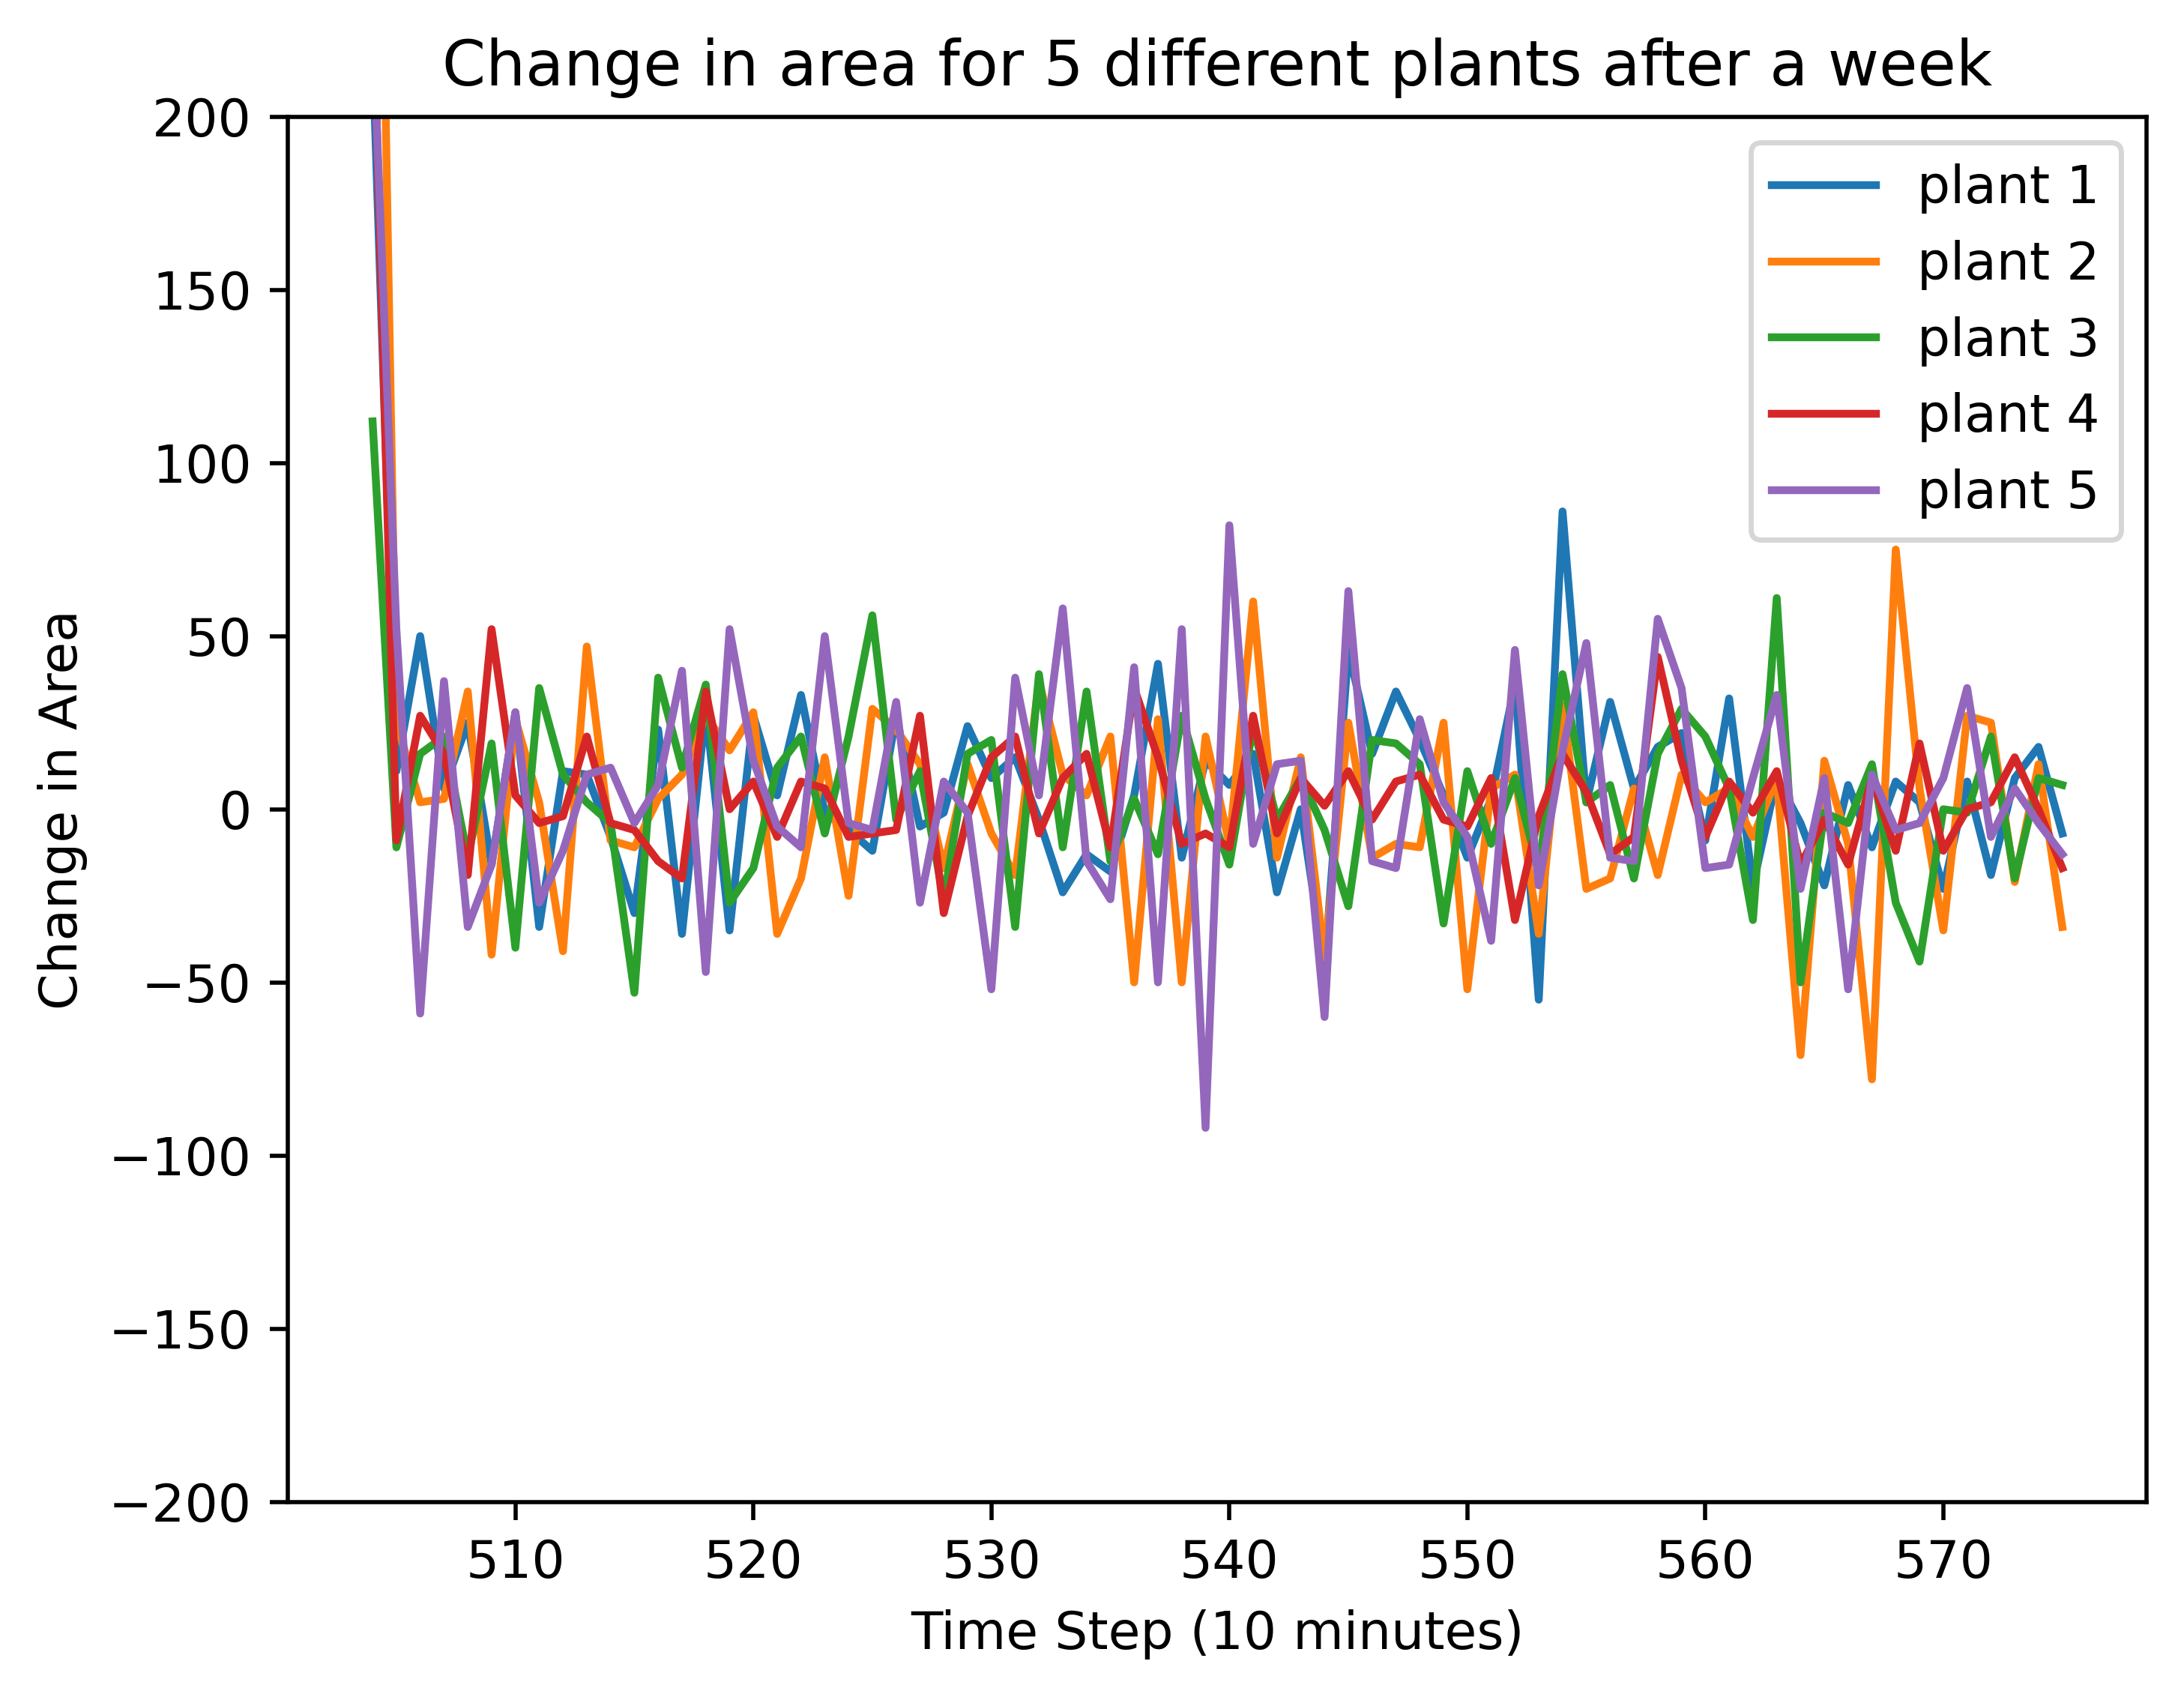

In [80]:
plt.figure(dpi=500)
example_plants = delta_df.iloc[503:575, 1:6]
for plant in example_plants.columns:
    label = ' '.join(plant.split()[:2])
    plt.plot(example_plants.index, example_plants[plant], label=label)

plt.ylim(-200, 200)
plt.xlabel('Time Step (10 minutes)')
plt.ylabel('Change in Area')
plt.title("Change in area for 5 different plants after a week")
plt.legend()
plt.show()

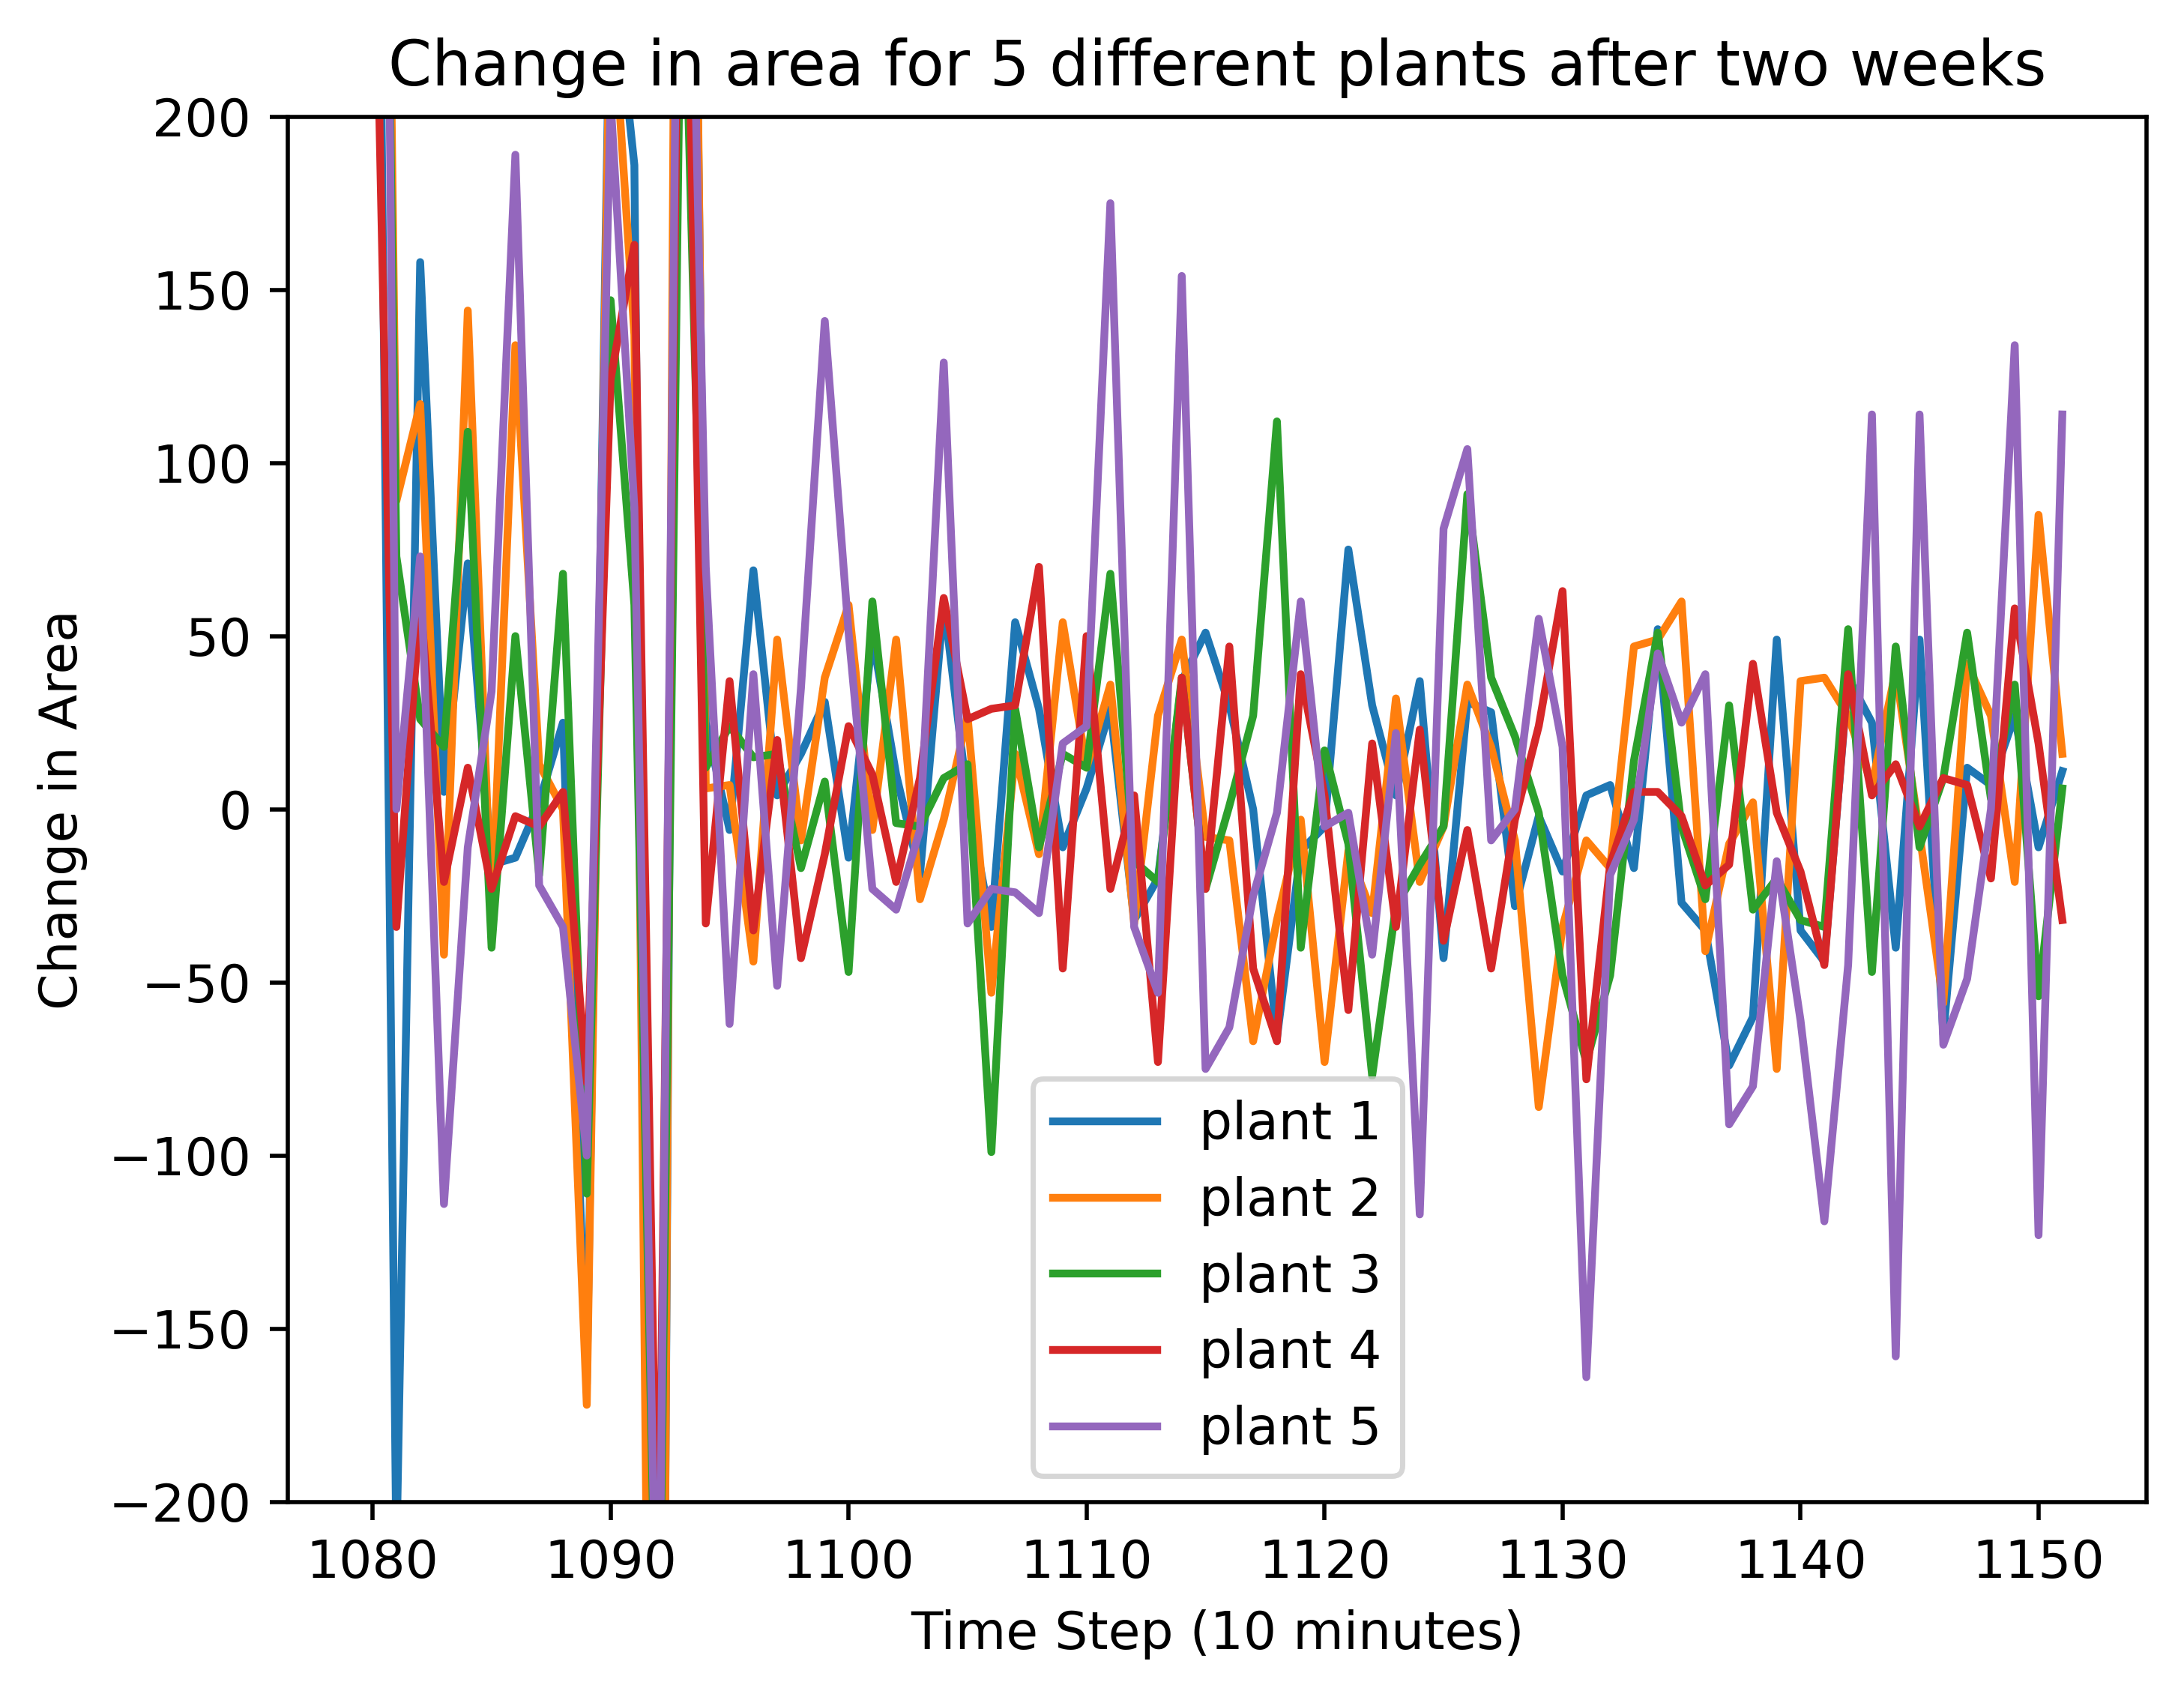

In [81]:
plt.figure(dpi=500)
example_plants = delta_df.iloc[1079:, 1:6]
for plant in example_plants.columns:
    label = ' '.join(plant.split()[:2])
    plt.plot(example_plants.index, example_plants[plant], label=label)

plt.ylim(-200, 200)
plt.xlabel('Time Step (10 minutes)')
plt.ylabel('Change in Area')
plt.title("Change in area for 5 different plants after two weeks")
plt.legend()
plt.show()

### EDA

Printing all rows where the change was greater than 100 (as well as the previous entry)
to see if they are at the start of new days or if something else explains this

In [82]:
mask = delta_df['mean_change'] > 100
delta_df[mask | mask.shift(-1, fill_value=False)]

timestamp  plant 1 (4-12-7)  plant 2 (4-12-7)  plant 3 (4-12-7)  \
287   2024-02-13 20:50             -14.0              16.0              -6.0   
288   2024-02-14 09:00             258.0              86.0              47.0   
431   2024-02-15 20:50              -9.0              -5.0             -23.0   
432   2024-02-16 09:00             177.0             273.0              72.0   
503   2024-02-16 20:50              59.0             -29.0              -4.0   
504   2024-02-17 09:00             219.0             416.0             112.0   
575   2024-02-17 20:50              -7.0             -34.0               7.0   
576   2024-02-18 09:00             243.0             399.0              71.0   
647   2024-02-18 20:50              15.0             -19.0              -7.0   
648   2024-02-19 09:00             376.0             542.0             197.0   
719   2024-02-19 20:50             -23.0             -47.0              10.0   
720   2024-02-20 09:00             144.0             411.0             234.0   
791   2024-02-20 20:50              17.0              23.0              25.0   
792   2024-02-21 09:00              83.0             574.0             146.0   
793   2024-02-21 09:10             141.0             147.0              42.0   
863   2024-02-21 20:50              -8.0             -67.0             -46.0   
864   2024-02-22 09:00             385.0             781.0             389.0   
865   2024-02-22 09:10              -4.0             125.0             -37.0   
889   2024-02-22 13:10              69.0              32.0              42.0   
890   2024-02-22 13:20             -80.0             -60.0             -53.0   
935   2024-02-22 20:50               9.0              -5.0               2.0   
936   2024-02-23 09:00             373.0             883.0             303.0   
951   2024-02-23 11:30            -106.0             -75.0            -123.0   
952   2024-02-23 11:40             288.0             111.0             121.0   
1007  2024-02-23 20:50              23.0             -38.0               1.0   
1008  2024-02-24 09:00            1047.0            1725.0             690.0   
1009  2024-02-24 09:10             -21.0             250.0              34.0   
1018  2024-02-24 10:40             -19.0             -39.0             -30.0   
1019  2024-02-24 10:50             276.0             228.0             125.0   
1079  2024-02-24 20:50             -26.0             -15.0             -43.0   
1080  2024-02-25 09:00             453.0             647.0             565.0   
1089  2024-02-25 10:30            -166.0            -172.0            -111.0   
1090  2024-02-25 10:40             251.0             242.0             147.0   
1091  2024-02-25 10:50             186.0             137.0              59.0   
1092  2024-02-25 11:00            -522.0            -544.0            -277.0   
1093  2024-02-25 11:10             557.0             614.0             271.0   

      plant 4 (4-12-7)  plant 5 (4-12-7)  plant 6 (4-12-7)  plant 7 (4-12-7)  \
287                2.0              11.0              -6.0             -30.0   
288               87.0              97.0             196.0             162.0   
431               -6.0               8.0               8.0              23.0   
432              191.0             182.0             211.0             203.0   
503                4.0              -2.0             -12.0             -37.0   
504              242.0             229.0             207.0             316.0   
575              -17.0             -13.0              35.0            -108.0   
576              298.0             212.0             201.0             308.0   
647                0.0               0.0             -41.0              -8.0   
648              200.0             378.0             419.0             437.0   
719               -4.0              31.0             -29.0             -72.0   
720              363.0             285.0             450.0             383.0   
791         

It seems that the big jumps usually happen overnight, though sometimes a large change in area also occurs in the first 10 mins of the day. Then there is the outlier period from 2024-02-25 10:30 to 2024-02-25 11:10 where we see large jumps every 10 mins (in particular two massive outliers with average change of -2039.069231 and 2049.338462). I wonder what is going on here?